# Monte Carlo Simulation of Portfolio Loss

**Goal:**  
Use PD, LGD, and EAD to simulate losses for each borrower over many scenarios.  

**Steps:**
1. Sample borrower defaults based on PD probabilities.
2. Compute individual losses: `Loss = LGD * EAD` if default occurs.
3. Repeat for N Monte Carlo iterations to get loss distribution.
4. Compute portfolio metrics: Expected Loss (EL) and 95% Value at Risk (VaR).


In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Path to dataset
project_path = Path("/home/skumar/Desktop/credit-risk-analytics")
csv_file = project_path / "data/input_raw/credit_portfolio.csv"

# Load dataset
data = pd.read_csv(csv_file)

# For simplicity, we will use the predicted values from Step-4 models
# Here, assume we have arrays y_pred_pd, y_pred_lgd, y_pred_ead
# For demonstration, we can use synthetic PD, LGD, EAD from dataset
data["PD_pred"] = data["PD"]  # predicted PD
data["LGD_pred"] = data["LGD"]  # predicted LGD
data["EAD_pred"] = data["EAD"]  # predicted EAD

print("✅ Dataset ready for Monte Carlo simulation")
data.head()


✅ Dataset ready for Monte Carlo simulation


,BorrowerID,Age,Income,CreditScore,LoanAmount,InterestRate,TermMonths,PD,LGD,EAD,PD_pred,LGD_pred,EAD_pred
0,1,59,24324,766,136717,0.0837,24,0.0599,0.3606,121789.20,0.0599,0.3606,121789.20
1,2,49,96323,713,167002,0.1396,12,0.0442,0.3472,150060.00,0.0442,0.3472,150060.00
2,3,35,29111,754,266691,0.0972,48,0.0248,0.1261,233692.63,0.0248,0.1261,233692.63
3,4,63,58110,532,86835,0.1512,12,0.1105,0.1895,72685.55,0.1105,0.1895,72685.55
4,5,28,36389,523,127232,0.0639,60,0.1209,0.1278,110827.12,0.1209,0.1278,110827.12


## Monte Carlo Simulation Logic

For each iteration:
1. Generate random numbers for each borrower.
2. If random number < PD → borrower defaults.
3. Loss = LGD * EAD for defaulted borrowers.
4. Sum all borrower losses → total portfolio loss for iteration.
5. Repeat N times to get distribution of portfolio losses.


In [2]:
# Number of Monte Carlo simulations
n_simulations = 10000

# Store portfolio losses
portfolio_losses = []

# Run simulation
for i in range(n_simulations):
    # Random numbers for defaults
    random_numbers = np.random.rand(len(data))
    
    # Determine defaults
    defaults = random_numbers < data["PD_pred"]
    
    # Calculate losses
    losses = defaults * data["LGD_pred"] * data["EAD_pred"]
    
    # Total portfolio loss
    portfolio_losses.append(losses.sum())

portfolio_losses = np.array(portfolio_losses)
print("✅ Monte Carlo simulation completed")


✅ Monte Carlo simulation completed


## Portfolio Loss Analysis

- Compute Expected Loss (EL)
- Compute 95% Value at Risk (VaR)
- Visualize loss distribution


In [3]:
# Expected Loss (mean)
expected_loss = portfolio_losses.mean()

# 95% Value at Risk (percentile)
var_95 = np.percentile(portfolio_losses, 95)

print(f"✅ Expected Loss (EL): {expected_loss:,.2f}")
print(f"✅ 95% Value at Risk (VaR 95%): {var_95:,.2f}")


✅ Expected Loss (EL): 5,685,178.61
✅ 95% Value at Risk (VaR 95%): 6,916,475.77


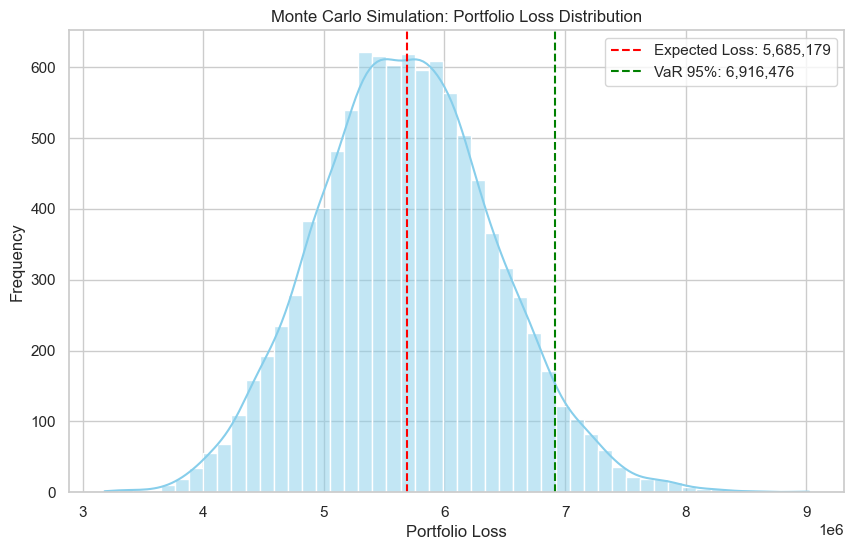

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(portfolio_losses, bins=50, kde=True, color="skyblue")
plt.title("Monte Carlo Simulation: Portfolio Loss Distribution")
plt.xlabel("Portfolio Loss")
plt.ylabel("Frequency")
plt.axvline(expected_loss, color="red", linestyle="--", label=f"Expected Loss: {expected_loss:,.0f}")
plt.axvline(var_95, color="green", linestyle="--", label=f"VaR 95%: {var_95:,.0f}")
plt.legend()
plt.show()


### Summary

- Monte Carlo simulation completed with 10,000 iterations
- Portfolio loss distribution plotted
- Metrics computed:
  - Expected Loss (EL)
  - 95% Value at Risk (VaR)
- Ready to use simulated losses for **report generation**


In [6]:
from pathlib import Path
import pandas as pd

# Base project path
project_path = Path("/home/skumar/Desktop/credit-risk-analytics")

# Paths to save figures and Excel reports
figures_path = project_path / "reports/figures"
outputs_path = project_path / "reports/outputs"

# Create folders if they don't exist
figures_path.mkdir(parents=True, exist_ok=True)
outputs_path.mkdir(parents=True, exist_ok=True)

print("✅ Report folders ready")


✅ Report folders ready


In [7]:
# Create a Pandas Excel writer
excel_file = outputs_path / "Portfolio_Report.xlsx"
with pd.ExcelWriter(excel_file, engine="xlsxwriter") as writer:
    
    # Portfolio Loss Summary
    loss_summary = pd.DataFrame({
        "Metric": ["Expected Loss", "VaR 95%"],
        "Value": [expected_loss, var_95]
    })
    loss_summary.to_excel(writer, sheet_name="Portfolio_Loss", index=False)
    
    # Model Predictions Summary
    model_summary = data[["BorrowerID", "PD_pred", "LGD_pred", "EAD_pred"]]
    model_summary.to_excel(writer, sheet_name="Model_Predictions", index=False)

print(f"✅ Excel report saved at: {excel_file}")


✅ Excel report saved at: /home/skumar/Desktop/credit-risk-analytics/reports/outputs/Portfolio_Report.xlsx
